In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/CO2Data.csv')
print(df["      CO2"])

0      315.69
1      317.45
2      317.50
3      315.86
4      314.93
        ...  
693    407.65
694    407.00
695    404.50
696    402.24
697    401.01
Name:       CO2, Length: 698, dtype: float64


In [2]:
df['time'] = df.index +.5
df['time'].head()


0    0.5
1    1.5
2    2.5
3    3.5
4    4.5
Name: time, dtype: float64

In [8]:
# Convert CO2 column to numeric data type
df['      CO2'] = pd.to_numeric(df['      CO2'], errors='coerce')

# Fill missing values
df['      CO2'] = df['      CO2'].interpolate()

# (a) Linear model
X1 = np.column_stack((np.ones(len(df)), df['time']))
y = df['      CO2'].values

# Fit the linear model
α, residuals, rank, singular_values = np.linalg.lstsq(X1, y)
y_pred1 = X1 @ α

print(α)

[3.07558198e+02 1.27345989e-01]


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_50388/1497230856.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  α, residuals, rank, singular_values = np.linalg.lstsq(X1, y)


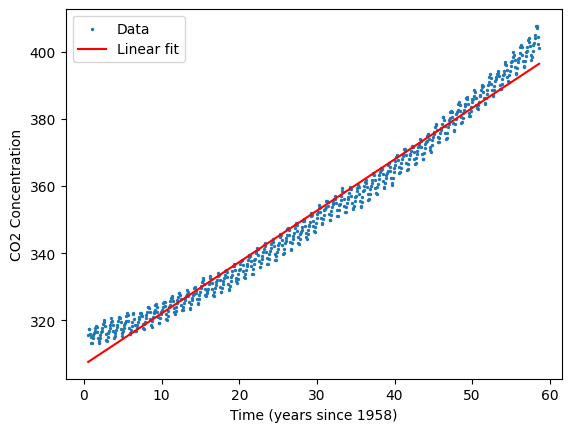

In [9]:

# Plot data and linear fit
plt.scatter(df['time']/12 +.5, df['      CO2'], label='Data',s=2)
plt.plot(df['time']/12+.5, y_pred1, color='red', label='Linear fit')
plt.xlabel('Time (years since 1958)')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()



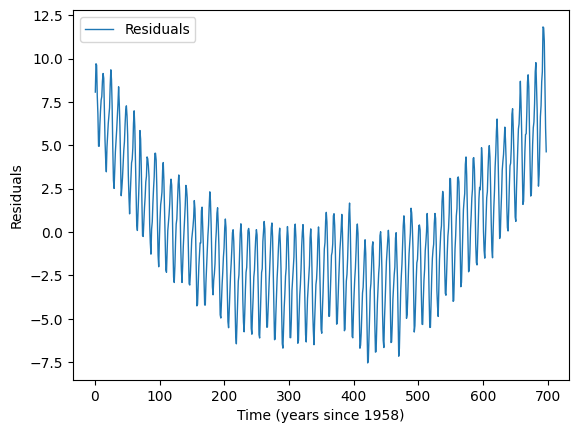

In [7]:

# Print α1 and α2
# print("α1:", α[0])
# print("α2:", α[1])

# Plot residual error
residuals1 = y - y_pred1
plt.plot(df['time'], residuals1, label='Residuals', linewidth=1)
plt.xlabel('Time (years since 1958)')
plt.ylabel('Residuals')
plt.legend()
plt.show()

/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_50388/2828758766.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  β, residuals, rank, singular_values = np.linalg.lstsq(X2, y)


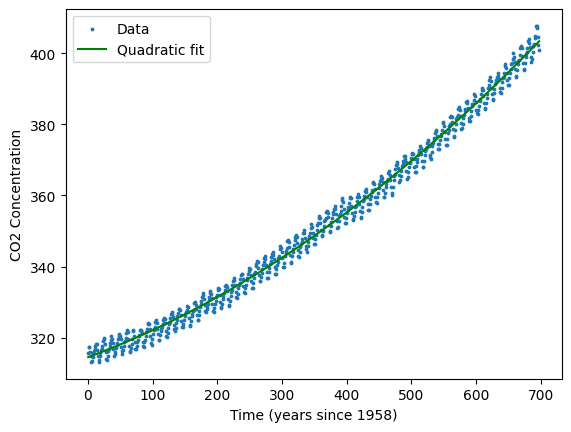

In [10]:
# (b) Quadratic model
X2 = np.column_stack((np.ones(len(df)), df['time'], df['time']**2))
y = df['      CO2'].values

# Fit the quadratic model
β, residuals, rank, singular_values = np.linalg.lstsq(X2, y)
y_pred2 = X2 @ β

# Plot data and quadratic fit
plt.scatter(df['time'], df['      CO2'], label='Data', s=3)
plt.plot(df['time'], y_pred2, color='green', label='Quadratic fit')
plt.xlabel('Time (years since 1958)')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

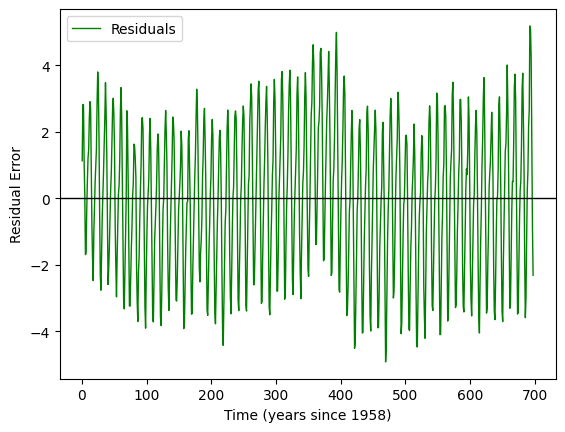

Beta values: [3.14529272e+02 6.74227793e-02 8.58498708e-05]


In [11]:


# Calculate residual error
residual_error = y - y_pred2

# Plot residual error
plt.plot(df['time'], residual_error, label='Residuals', linewidth=1, color='green')
# plot horizontal line at zero
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel('Time (years since 1958)')
plt.ylabel('Residual Error')
plt.legend()
plt.show()
print("Beta values:", β)
